In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing the Data

In [2]:
df = pd.read_csv("Customer-Churn.csv")

## 1. Summary of the Dataset
This dataset contains information about telecom customers and their service usage. Each row represents a single customer and includes details such as customer demographics, the type of services they use, their contract and payment information, and how much they are charged. The dataset also indicates whether the customer has left the company (churned) or not. The main purpose of this dataset is to analyze customer behavior, understand the factors that lead to churn, and build a machine learning model to predict the probability of customer churn so that businesses can take early retention actions.

## 2. Columns Description

| Column Name      | Description (Simple Words)                              |
| ---------------- | ------------------------------------------------------- |
| customerID       | Unique identifier for each customer                     |
| gender           | Gender of the customer                                  |
| SeniorCitizen    | Indicates whether the customer is a senior citizen      |
| Partner          | Whether the customer has a partner                      |
| Dependents       | Whether the customer has dependents                     |
| tenure           | Number of months the customer has been with the company |
| PhoneService     | Whether the customer has phone service                  |
| MultipleLines    | Whether the customer has multiple phone lines           |
| InternetService  | Type of internet service used                           |
| OnlineSecurity   | Whether online security service is enabled              |
| OnlineBackup     | Whether online backup service is used                   |
| DeviceProtection | Whether device protection service is used               |
| TechSupport      | Whether technical support service is available          |
| StreamingTV      | Whether streaming TV service is used                    |
| StreamingMovies  | Whether streaming movies service is used                |
| Contract         | Type of contract the customer has                       |
| PaperlessBilling | Whether billing is paperless                            |
| PaymentMethod    | Method used to pay bills                                |
| MonthlyCharges   | Monthly charges paid by the customer                    |
| TotalCharges     | Total amount paid by the customer so far                |
| Churn            | Indicates whether the customer left the company         |


## Data Wrangling

### a. Data Assessing

In [3]:
# making a copy of our data 
data = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning 

#### Steps :
- Converted `TotalCharges` from string to float using `pd.to_numeric()` and identified missing values.
- Observed that missing `TotalCharges` occurred only for new customers with `tenure = 0`.
- Replaced those missing values with `0`, since no billing had occurred yet, ensuring business and data correctness.


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Set display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#Checking wheather TechSupport, StreamingTV, StreamingMovies are same
print(df['TechSupport'].value_counts())
print(df['StreamingTV'].value_counts())
print(df['StreamingMovies'].value_counts())

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [15]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# filling the those NaN values in TotalCharges with 0 because they are the new customers who joined recently(tenure = 0)
df.loc[df[df['TotalCharges'].isnull()].index,'TotalCharges'] = 0

In [17]:
# testing them wheather the values are updated
df.loc[[1340, 3331, 4380, 6754], :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

### Univariate Analysis :

#### 🔹Insights

- **Gender:** The dataset has an almost equal number of male and female customers, indicating a balanced gender distribution.
- **PhoneService:** A large majority of customers have phone service, while only a small portion do not.
- **InternetService:** Fiber optic is the most common internet service, followed by DSL, and a smaller group of customers do not use any internet service.
- **Contract:** Month-to-month contracts are the most frequent, while one-year and two-year contracts are less common.
- **PaperlessBilling:** More customers use paperless billing compared to traditional paper billing.
- **PaymentMethod:** Electronic check is the most widely used payment method, followed by mailed check and automatic payment options.
- **Churn:** Most customers have not churned, showing that the dataset is imbalanced with fewer churned customers.
- **SeniorCitizen:** The majority of customers are not senior citizens, with senior citizens forming a smaller segment.
- **Tenure:** The tenure distribution shows many new customers with low tenure and a considerable number of long-term customers.
- **MonthlyCharges:** Monthly charges vary across a wide range, with many customers concentrated in the mid to higher charge levels.
- **TotalCharges:** Total charges range from very low to high values, where low values mainly represent new customers with short or zero tenure, and higher values indicate long-term customers who have stayed with the company for a longer period.



In [19]:
def univarite_analysis(cat_col,num_col):
    for col in cat_col:
        sns.countplot(df[col],color='yellow')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    for col in num_col:
        sns.histplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()       

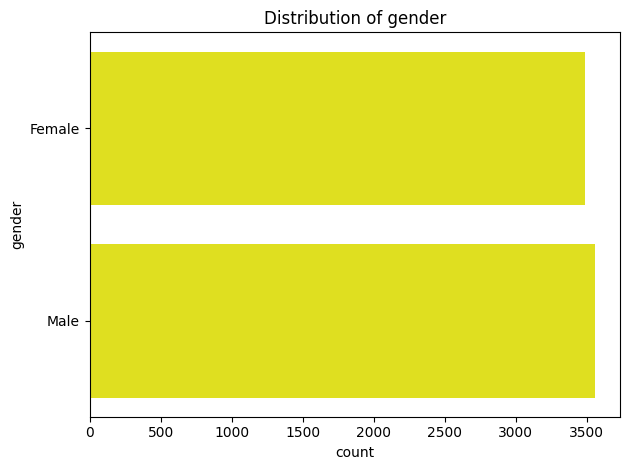

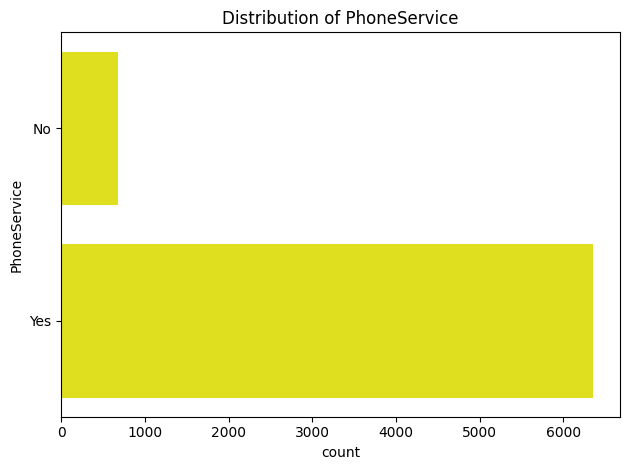

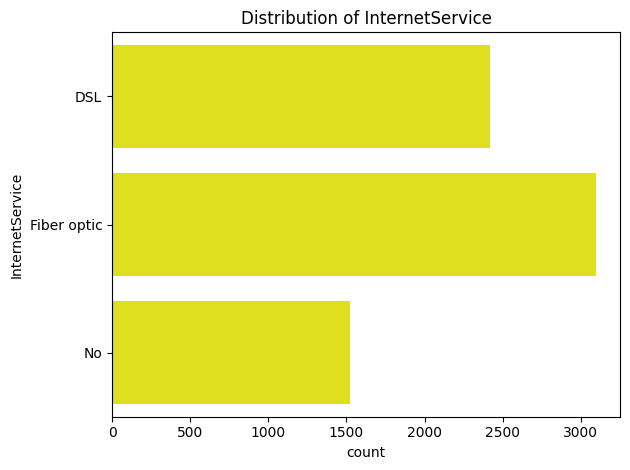

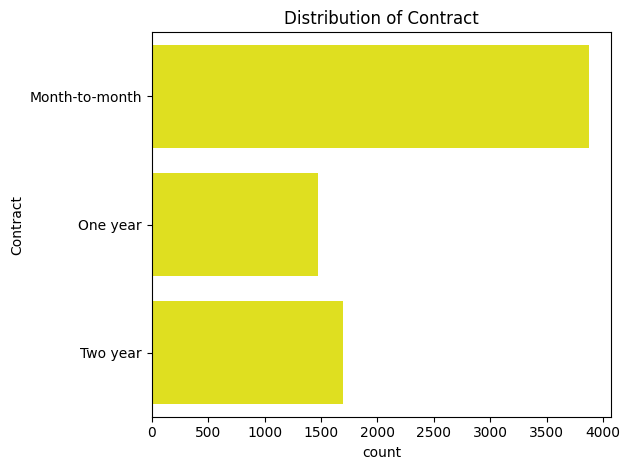

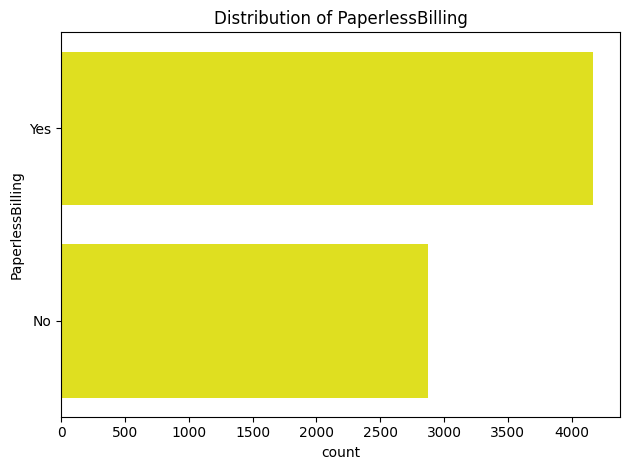

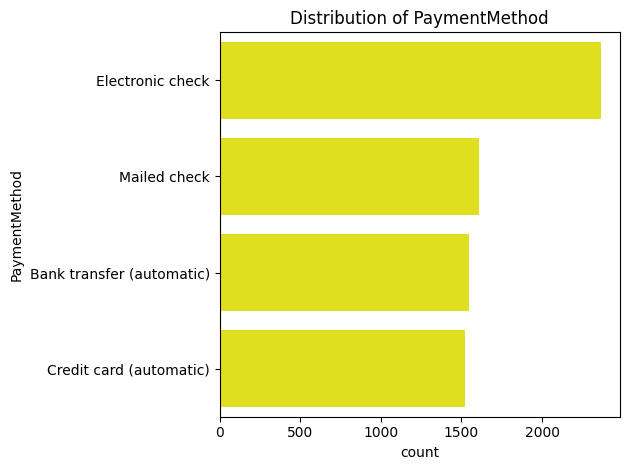

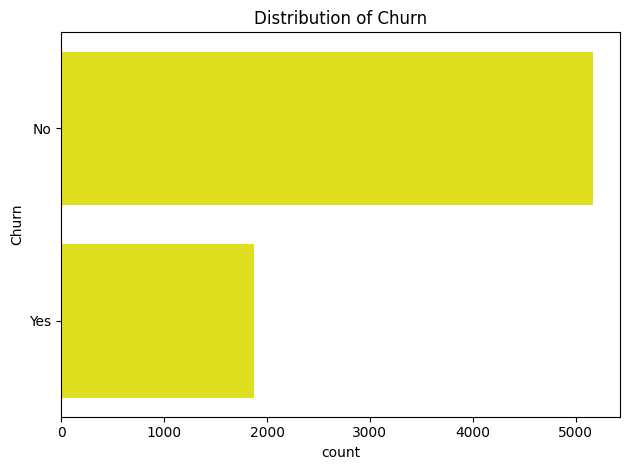

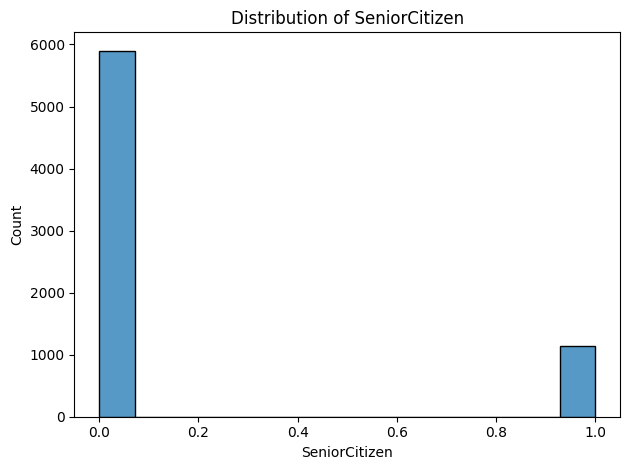

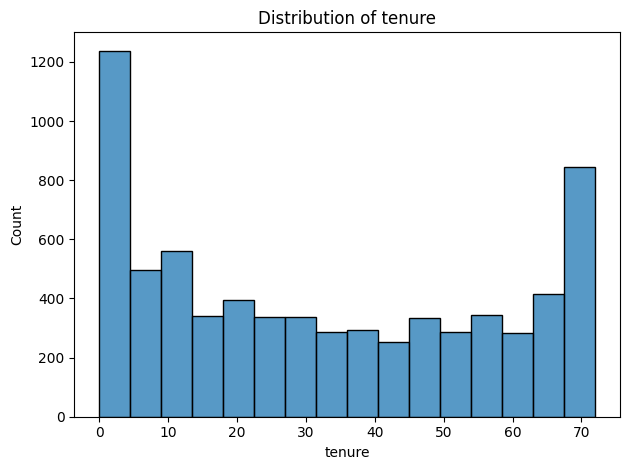

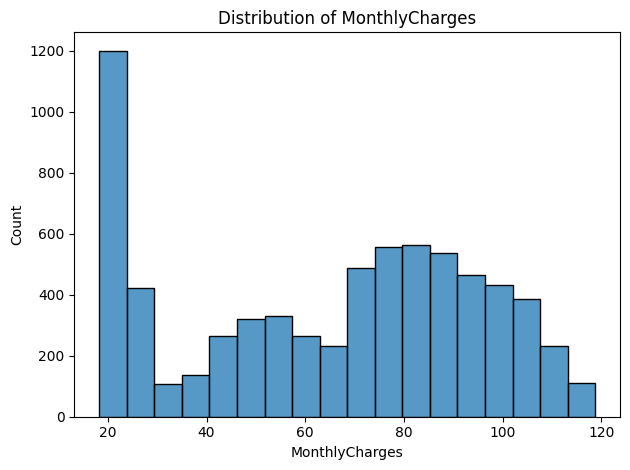

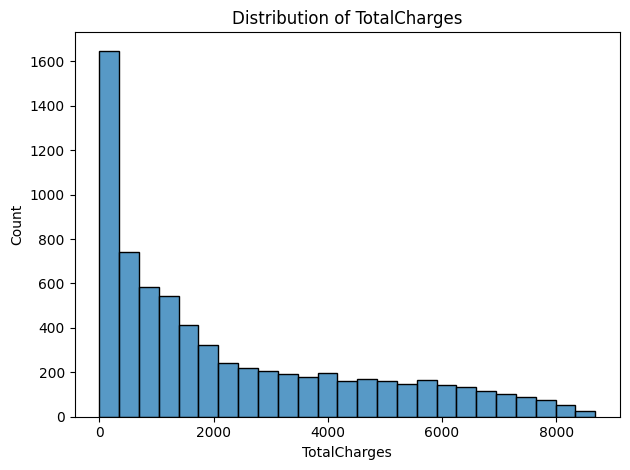

In [20]:
univarite_analysis(cat_col=['gender','PhoneService','InternetService','Contract','PaperlessBilling','PaymentMethod','Churn'],num_col=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])

## 🔹Bivariate & Multivariate 

### a. Numerical - Numerical 

- **Tenure vs TotalCharges:**  
  Total charges increase steadily as tenure increases, showing a strong positive relationship. Customers with higher tenure have paid more overall, while new customers with low tenure have very low or zero total charges. Churned customers are more concentrated at lower tenure and lower total charges.

- **Tenure vs MonthlyCharges:**  
  Monthly charges remain spread across all tenure levels, indicating that customers pay similar monthly amounts regardless of how long they stay. However, churned customers are more frequently observed at lower tenure levels, even when monthly charges are high.

- **Churn Pattern Observation:**  
  Customers who churn tend to leave early in their relationship with the company, whereas long-tenure customers are more likely to stay, even if their monthly charges are relatively high.


In [21]:
def num_num(col1, col2):

    plt.figure(figsize=(8, 6))

    sns.scatterplot(
        x=df[col1],
        y=df[col2],
        hue=df["Churn"],
        alpha=0.6
    )

    plt.title(f"Relationship Between {col1} and {col2}")

    # ---- Legend outside ----
    plt.legend(
        title="Churn",
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
    )

    plt.tight_layout()
    plt.show()


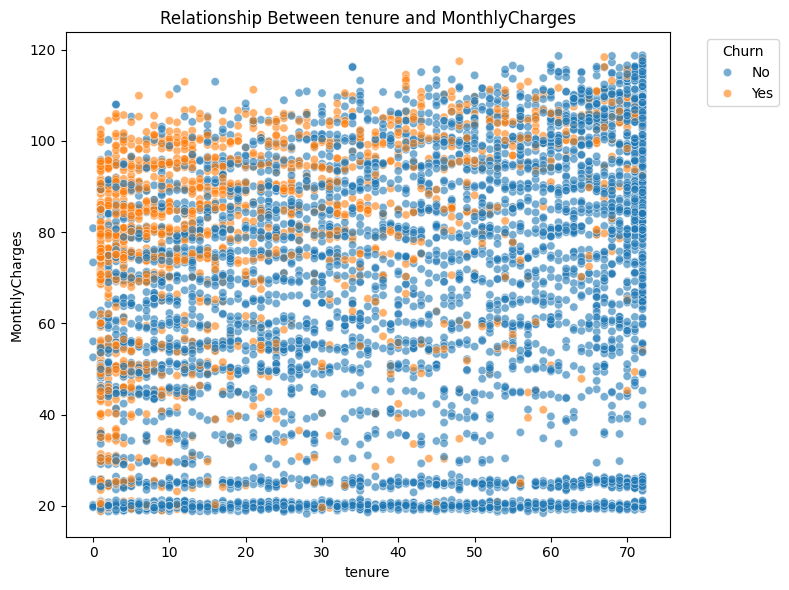

In [22]:
num_num('tenure','MonthlyCharges')

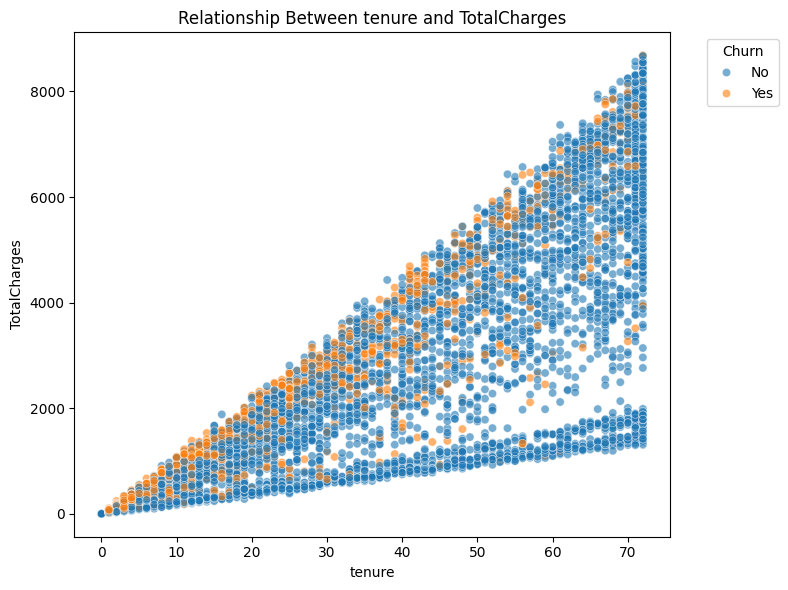

In [23]:
num_num('tenure','TotalCharges')

## b. Categorical - Numerical

### 🔹 Insights

- **Gender vs Tenure:**  
  For both males and females, customers who churn have a much lower average tenure compared to those who stay. Gender does not show a strong difference in churn behavior, but churn generally happens earlier for all customers.

- **Payment Method vs Tenure:**  
  Customers using **electronic check** and **mailed check** tend to churn at much lower tenure, indicating less stable payment behavior. In contrast, customers using **automatic payment methods** (bank transfer or credit card) have higher tenure and are more likely to stay.

- **Contract vs Tenure:**  
  Customers on **month-to-month contracts** churn much earlier compared to those on long-term contracts. **One-year and two-year contracts** show significantly higher tenure, indicating stronger customer retention.

- **Internet Service vs Tenure:**  
  Customers using **fiber optic internet** show higher churn at lower tenure compared to DSL users. Customers with **no internet service** tend to have very low churn and higher stability.

- **Overall Churn Pattern:**  
  Across all categories, churned customers consistently show **lower tenure**, confirming that churn is more likely to occur during the early stages of the customer lifecycle.

---

### Key Takeaway
> Early customer experience, contract type, payment method, and internet service play a major role in customer retention, with short-term contracts and non-automatic payments associated with higher churn.


### 🔹Insights

- **MonthlyCharges vs Churn:**  
  Customers who churn generally have **higher monthly charges** compared to customers who stay. This suggests that higher pricing increases the likelihood of churn, especially when customers do not perceive enough value.

- **MonthlyCharges vs Contract vs Churn:**  
  Customers on **month-to-month contracts with high monthly charges** show the highest churn risk. In contrast, customers with **one-year or two-year contracts** tend to stay longer even if their monthly charges are high.

- **MonthlyCharges vs InternetService vs Churn:**  
  Customers using **fiber optic internet** usually have higher monthly charges and also exhibit higher churn. DSL customers have relatively lower charges and are more stable, while customers without internet service have the lowest charges and lowest churn.

- **MonthlyCharges vs PaymentMethod vs Churn:**  
  High churn is more common among customers paying via **electronic check**, especially when monthly charges are high. Customers using **automatic payment methods** show lower churn even at higher monthly charges.

---

### Key Takeaway
> High monthly charges combined with short-term contracts, non-automatic payment methods, and fiber optic services significantly increase churn risk, especially for new customers.


In [29]:
def cat_num(cat_col,num_col):
    plt.figure(figsize=(9,7))
    sns.barplot(x=df[cat_col],y=df[num_col],hue=df['Churn'],palette="viridis")
    plt.legend(
        title="Churn",
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
    )
    plt.title(f"Customer Churn by {cat_col} and {num_col}")
    plt.tight_layout()
    plt.show()

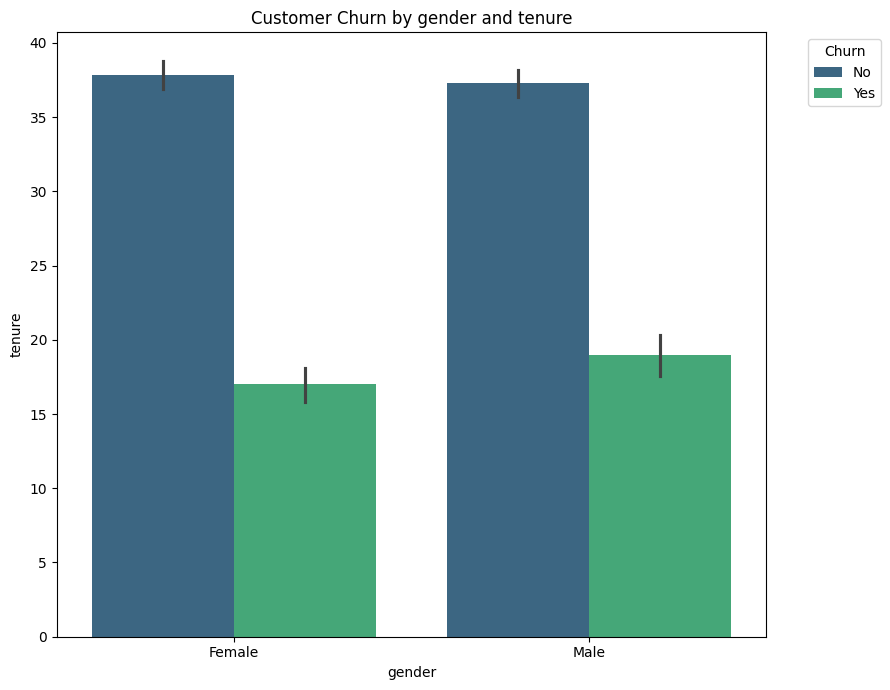

In [30]:
cat_num(cat_col='gender',num_col='tenure')

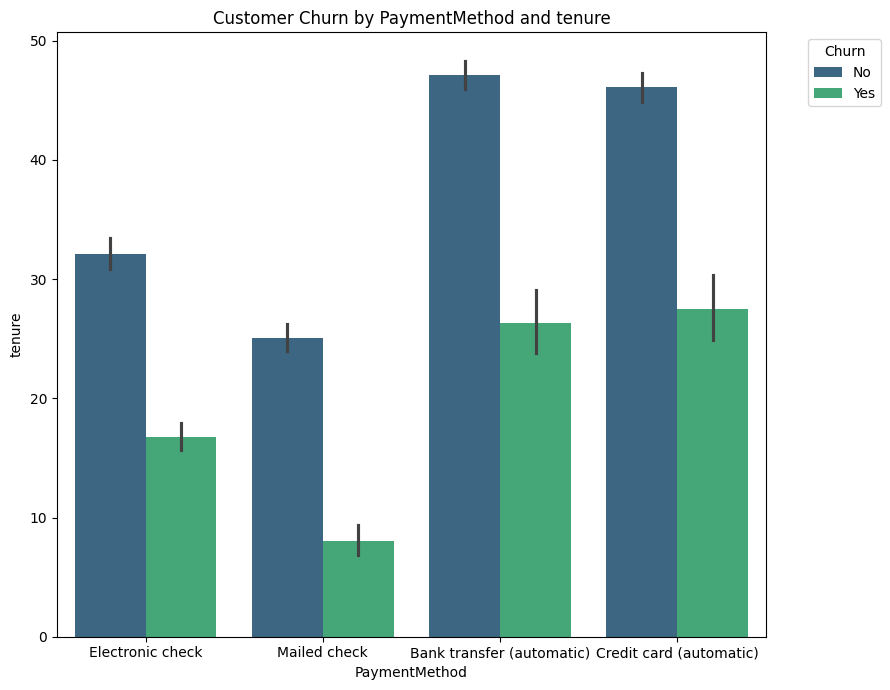

In [31]:
cat_num(cat_col='PaymentMethod',num_col='tenure')

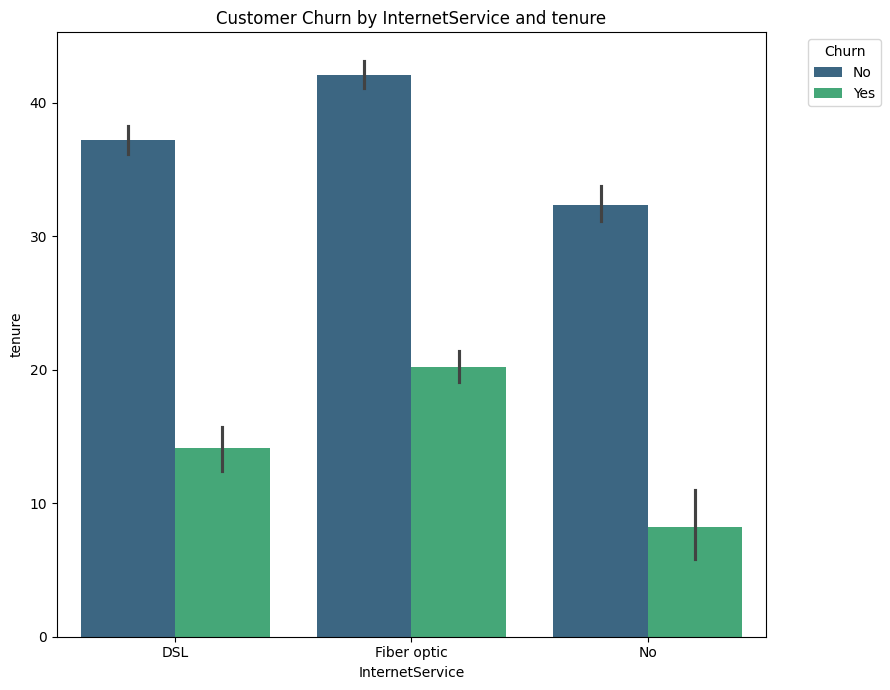

None


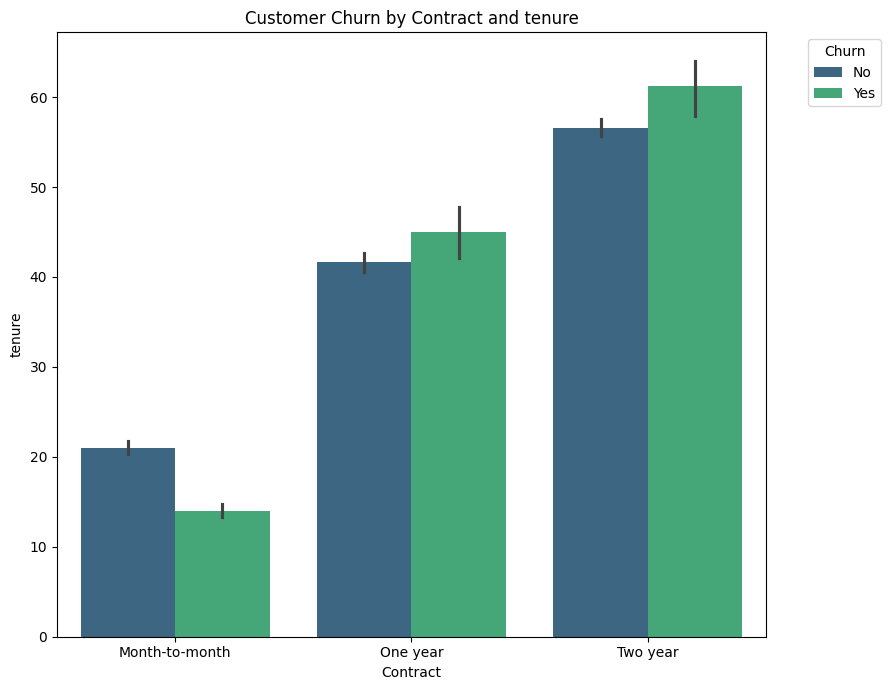

None


In [32]:
print(cat_num(cat_col='InternetService',num_col='tenure'))
print(cat_num(cat_col='Contract',num_col='tenure'))

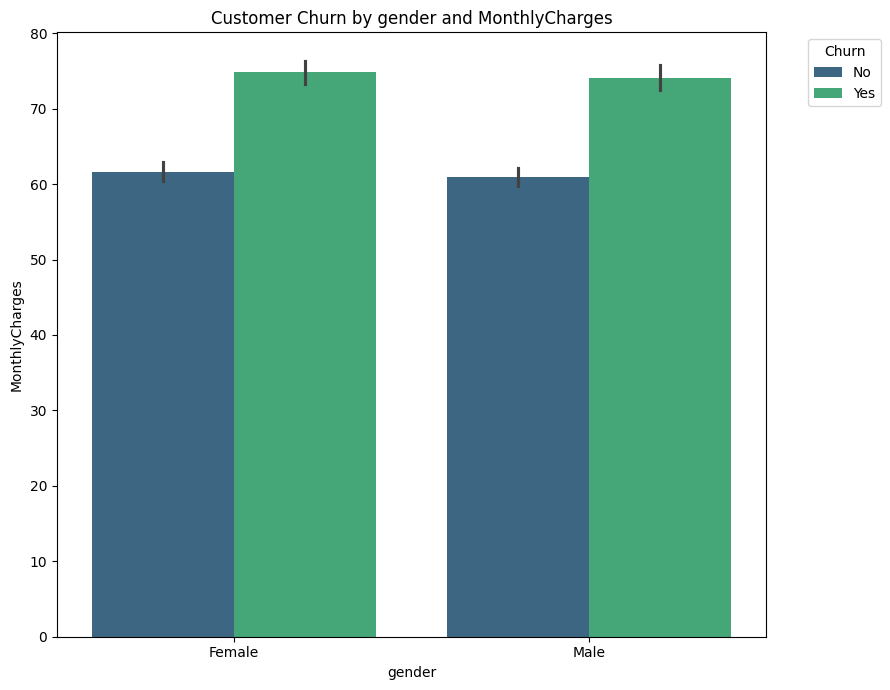

None


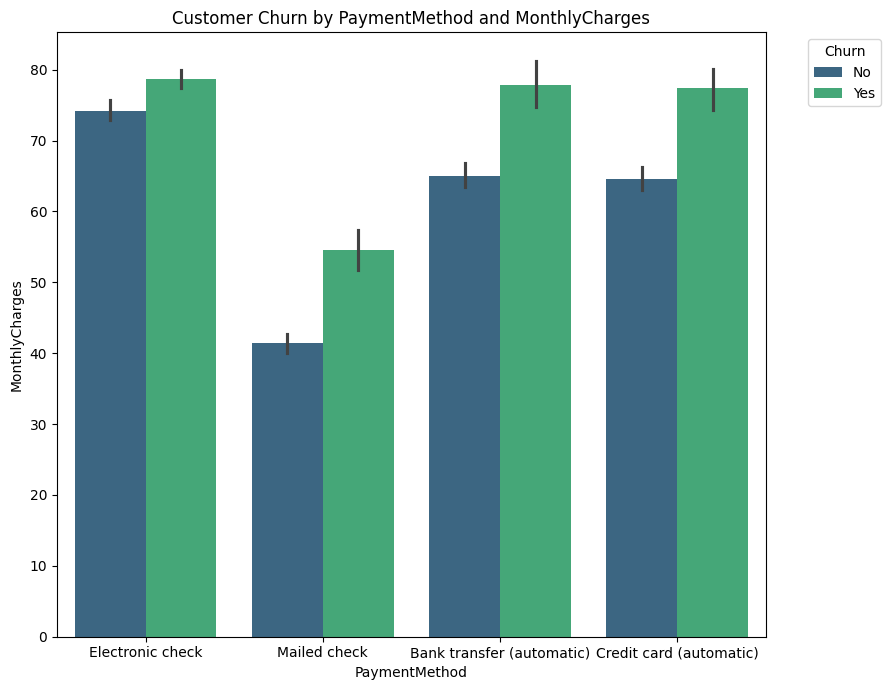

None


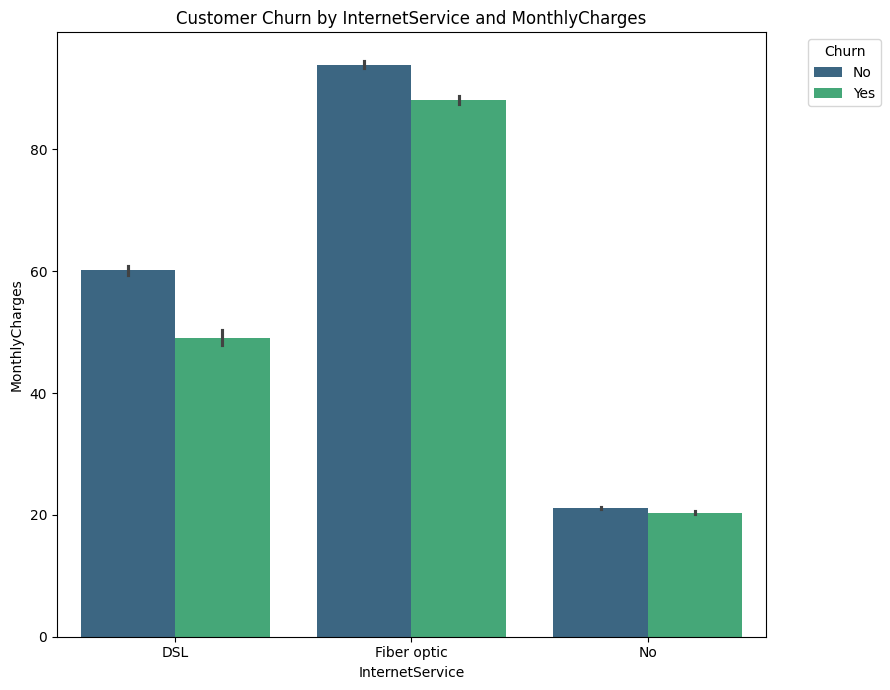

None


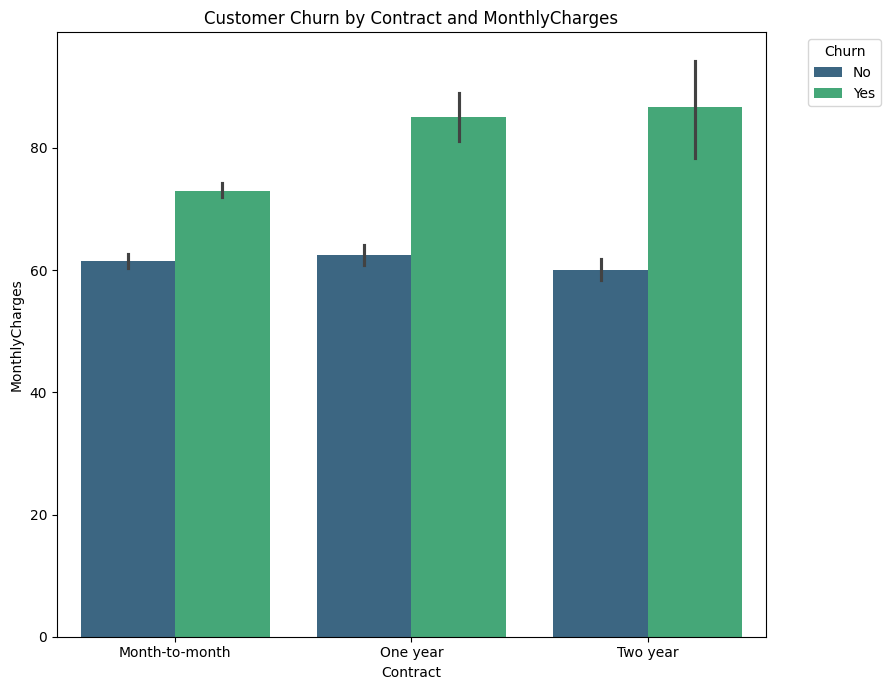

None


In [33]:
print(cat_num(cat_col='gender',num_col='MonthlyCharges'))
print(cat_num(cat_col='PaymentMethod',num_col='MonthlyCharges'))
print(cat_num(cat_col='InternetService',num_col='MonthlyCharges'))
print(cat_num(cat_col='Contract',num_col='MonthlyCharges'))

## c. Categorical - Categorical

### 🔹 Categorical Features vs Churn – Key Insights

- **Gender:**  
  Churn counts are almost equal for males and females, indicating that gender does not have a strong impact on churn.

- **Partner:**  
  Customers **without a partner** show significantly higher churn compared to those with a partner, suggesting family or household stability reduces churn risk.

- **Dependents:**  
  Customers **without dependents** churn much more than customers with dependents. Having dependents is associated with stronger customer retention.

- **PhoneService:**  
  Customers with phone service account for most churn simply because they form the majority, but churn proportion is not strongly driven by phone service alone.

- **InternetService:**  
  **Fiber optic customers have the highest churn**, followed by DSL users. Customers with **no internet service show very low churn**, indicating internet service type is a strong churn driver.

- **OnlineSecurity:**  
  Customers **without online security** churn far more than those with security enabled. Having online security significantly reduces churn.

- **OnlineBackup:**  
  Churn is higher among customers who do not use online backup services, while customers with backup services are more likely to stay.

- **TechSupport:**  
  Customers **without tech support** show very high churn, whereas customers with tech support have much lower churn, highlighting support services as a key retention factor.

- **Contract:**  
  **Month-to-month contracts have extremely high churn**, while one-year and especially two-year contracts show very low churn. Contract length is one of the strongest churn predictors.

- **PaperlessBilling:**  
  Customers using **paperless billing churn more** than those using paper billing, possibly due to their higher use of digital and month-to-month plans.

- **PaymentMethod:**  
  Customers paying via **electronic check have the highest churn by a large margin**. Customers using **automatic payment methods** (bank transfer or credit card) are far more stable.

---

###  Overall Business Takeaway
> Churn is strongly driven by contract type, payment method, internet service, and support services rather than demographic factors. Customers on month-to-month contracts, paying via electronic check, using fiber optic internet, and lacking support services are at the highest risk of churn.


In [115]:
gender_ct = pd.crosstab(index=df['gender'],columns=df['Churn'])
partner_ct = pd.crosstab(index=df['Partner'],columns=df['Churn'])
Dependents_ct = pd.crosstab(index=df['Dependents'],columns=df['Churn'])
phone_service_ct = pd.crosstab(index=df['PhoneService'],columns=df['Churn'])
internet_ct = pd.crosstab(index=df['InternetService'],columns=df['Churn'])
Os_ct = pd.crosstab(index=df['OnlineSecurity'],columns=df['Churn'])
Ob_ct = pd.crosstab(index=df['OnlineBackup'],columns=df['Churn'])
tech_ct = pd.crosstab(index=df['TechSupport'],columns=df['Churn'])
con_ct = pd.crosstab(index=df['Contract'],columns=df['Churn'])
bill_ct = pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'])
pay_ct = pd.crosstab(index=df['PaymentMethod'],columns=df['Churn'])

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


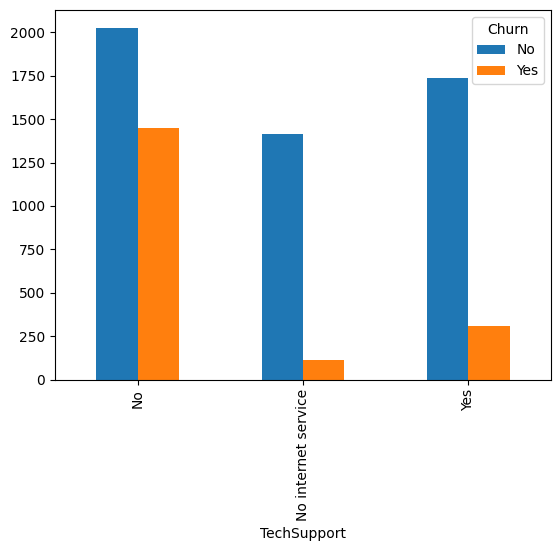

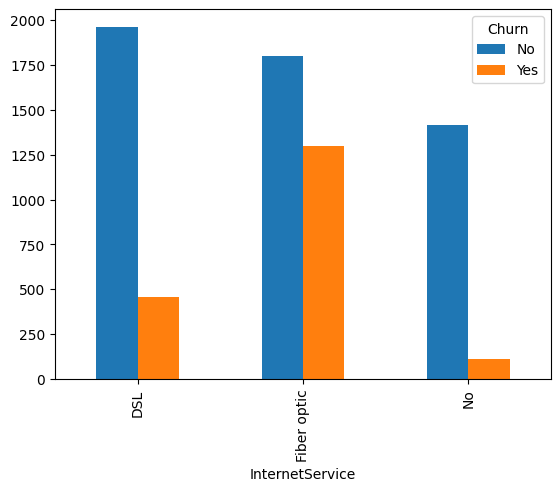

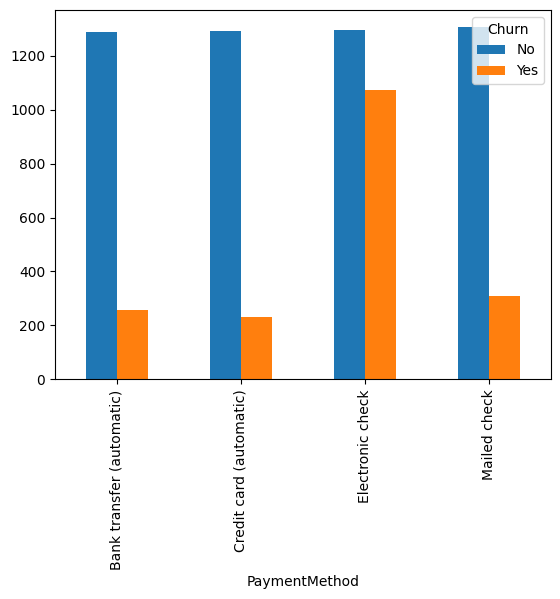

In [125]:
print(tech_ct.plot(kind='bar'))
print(internet_ct.plot(kind='bar'))
print(pay_ct.plot(kind='bar'))

In [131]:
print(gender_ct)
print("---------------------")
print(partner_ct)
print("---------------------")
print(Dependents_ct)
print("---------------------")
print(phone_service_ct)
print("---------------------")
print(internet_ct)
print("---------------------")
print(Os_ct)
print("---------------------")
print(Ob_ct)
print("---------------------")
print(tech_ct)
print("---------------------")
print(con_ct)
print("---------------------")
print(bill_ct)
print("---------------------")
print(pay_ct)

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
---------------------
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
---------------------
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
---------------------
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
---------------------
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
---------------------
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
---------------------
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523
---------------------
Churn                  No   Yes
TechSuppor

In [132]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 🔹 InternetService × Contract × Churn Insights

- **Fiber optic customers contribute the highest churn**, especially those on **month-to-month contracts**, indicating that short-term contracts combined with fiber optic service have the greatest churn risk.

- **DSL customers show moderate churn**, with churn still dominated by **month-to-month contracts**, but relatively more stable than fiber optic users.

- **Customers with no internet service have the lowest churn**, and a larger proportion of them are on **long-term contracts**, contributing to better retention.

- Across all internet service types, **churn decreases significantly as contract duration increases**, with **two-year contracts showing the lowest churn**.

---

### Key Takeaway
> Churn is strongly driven by the combination of internet service type and contract length, with fiber optic customers on month-to-month contracts representing the most vulnerable segment.


<Axes: xlabel='InternetService'>

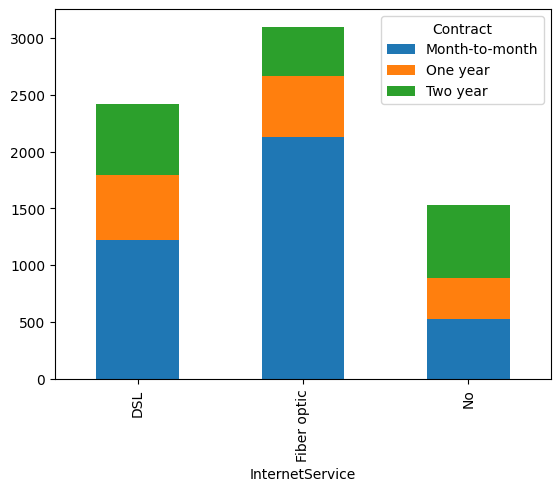

In [140]:
pd.crosstab(index=df['InternetService'],columns=df['Contract'],values=df['Churn'],aggfunc='count').plot(kind='bar',stacked=True)

### 🔹 Contract × PaymentMethod × Churn (%) Insights

- **Month-to-month customers using electronic check have the highest churn rate (~48%)**, making this the most high-risk customer segment.

- **Automatic payment methods (bank transfer and credit card)** show much lower churn for month-to-month customers (~14–15%), indicating that payment automation improves retention.

- **One-year contracts show moderate churn (around 23–27%) across all payment methods**, suggesting that longer commitments reduce churn regardless of how customers pay.

- **Two-year contracts have the lowest churn overall**, especially for customers paying via **electronic check (~10%)**, highlighting contract length as a strong retention factor.

- **Mailed check users show similar churn (~23%) across all contract types**, indicating that payment method has less impact once customers commit to longer contracts.

---

### Key Takeaway
> The combination of short-term contracts and non-automatic payment methods—especially electronic checks—drives the highest churn, while long-term contracts and automated payments significantly reduce churn risk.


Text(0.5, 1.0, 'Churn (%) by Contract and PaymentMethod')

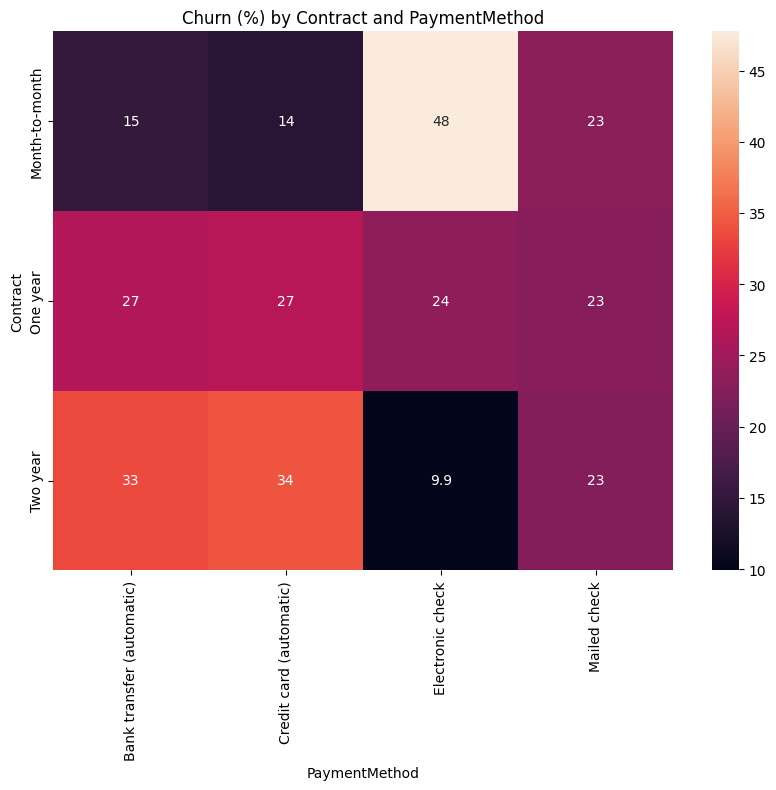

In [147]:
ct  = pd.crosstab(index=df['Contract'],columns=df['PaymentMethod'],values=df['Churn'],aggfunc='count',normalize='index')*100
plt.figure(figsize=(10,7))
sns.heatmap(ct,annot=True)
plt.title("Churn (%) by Contract and PaymentMethod")

### 🔹Combined Insights: Support Services, Monthly Charges, and Churn

- Customers with **more support services pay higher monthly charges**, indicating that support services are bundled with premium plans.

- **Churn rate decreases sharply as the number of support services increases**. Customers with **0–1 services show the highest churn**, while those with **3–4 services have the lowest churn**.

- Although higher support service counts lead to higher prices, **customers receiving more services are less likely to churn**, suggesting that added value offsets price sensitivity.

- Customers with **no support services (0 or “No Service”) are the most vulnerable segment**, showing both **lower engagement and higher churn risk**.

- This indicates that **customer engagement (services used)** is a stronger retention driver than price alone.

### Business Implication
- Encouraging customers to adopt additional support services can **reduce churn**, even if it increases monthly charges.
- Targeted bundling strategies for low-service customers may significantly improve retention.

In [35]:
# For support Serivces plot
support_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "TechSupport",
    "DeviceProtection"
]

df_plot = df.copy()

df_plot[support_cols] = df_plot[support_cols].replace({"Yes": 1, "No": 0})

df_plot["support_services_count"] = df_plot[support_cols].sum(axis=1)


In [61]:
index = df_plot[df_plot['support_services_count'].str.contains('No internet',na=False)].index
df_plot.loc[index,'support_services_count'] = "No Serivce"

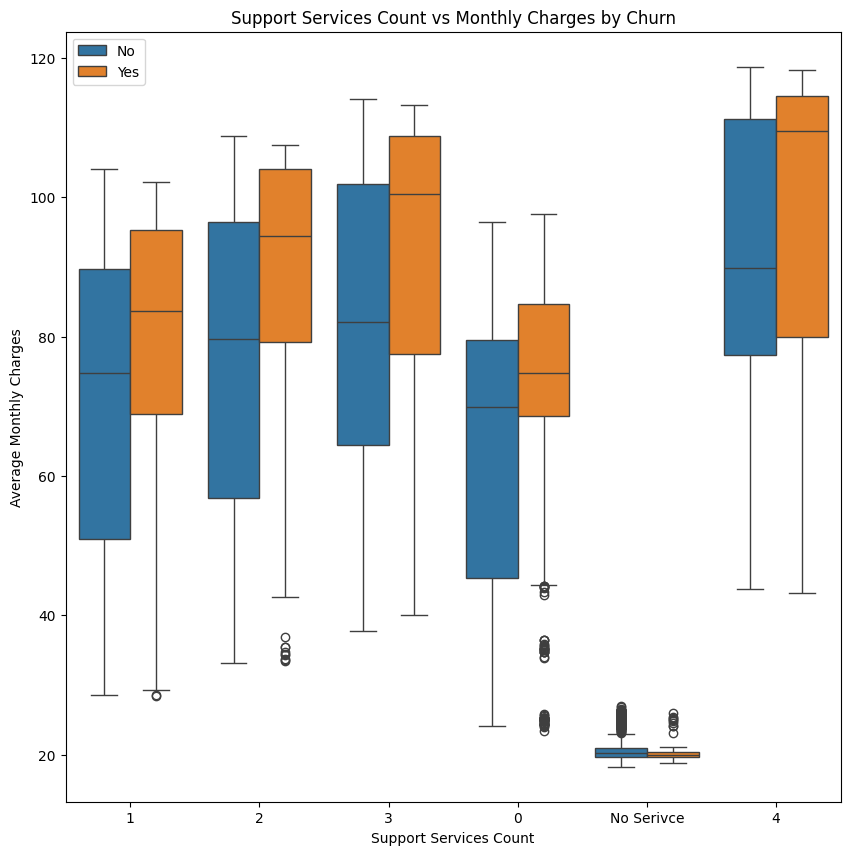

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_plot['support_services_count'],y=df_plot['MonthlyCharges'],hue=df['Churn'])
plt.title("Support Services Count vs Monthly Charges by Churn")
plt.xlabel("Support Services Count")
plt.ylabel("Average Monthly Charges")
plt.legend(loc='best')
plt.show()

In [70]:
churn_rate = (
    df_plot
    .groupby("support_services_count")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

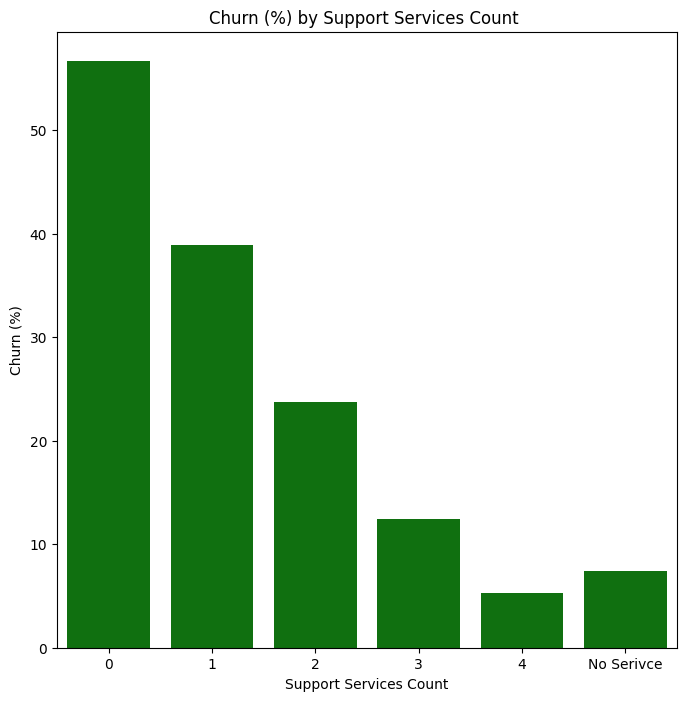

In [80]:
plt.figure(figsize=(8,8))
sns.barplot(churn_rate,color='green')
plt.title("Churn (%) by Support Services Count ")
plt.xlabel("Support Services Count")
plt.ylabel("Churn (%)")
plt.show()

In [ ]:
df.to_csv("cleaned_customers.csv")